# Problème posé :

On a des mesures enregistrées par un sonar sous différents angles et intensité (60 variables V1 ... V60) pour différents objets sous-marins, et la nature de l'objet détecté correspondant (variable Class: 0 pour "rocher" et 1 pour "mine", c'est-à-dire un objet cylindirque et métallique).

Question : Est-on capable de correctement détecter les mines ?

(But : maximiser le recall de 0 ? )

#### Nous commençons par importer les librairies qui pourrons nous être utiles par la suite

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

#### Nous importons le dataset

In [15]:
dataset = pd.read_csv('./Sonar.csv', sep=';')

# Data Exploration

In [16]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


Nous pouvons avoir une vue global des valeurs des premières variables du dataset. 
Nous observons que le dataset à l'air d'être composé de variable numériques (float).

In [17]:
dataset.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

In [18]:
dataset.shape

(208, 61)

Notre dataset est composé de 61 colonnes (donc 60 variables) et 208 lignes 

In [19]:
dataset.dtypes.value_counts()

float64    60
int64       1
dtype: int64

In [20]:
dataset['Class'].value_counts()

1    111
0     97
Name: Class, dtype: int64

/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

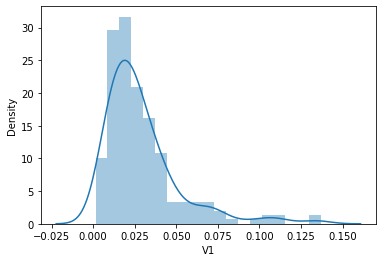

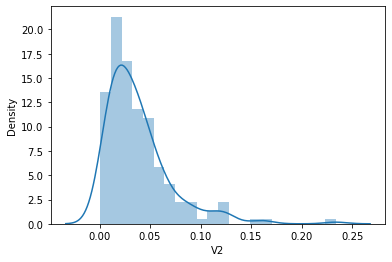

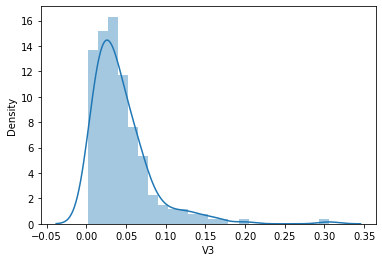

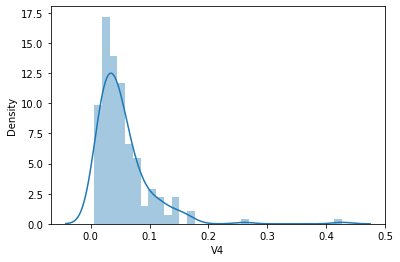

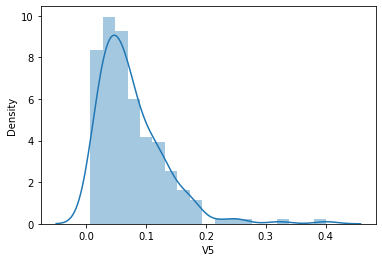

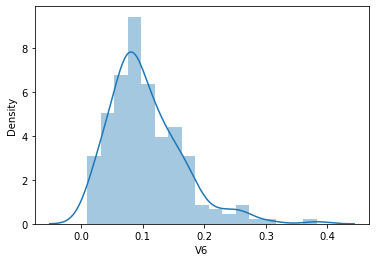

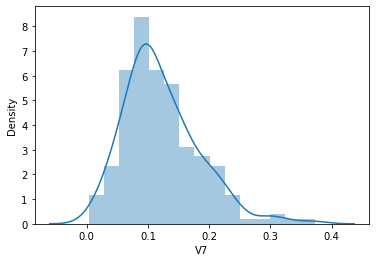

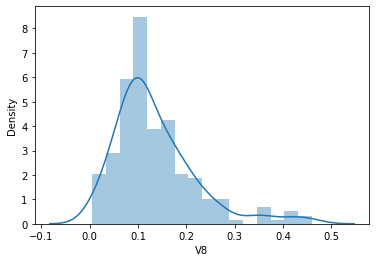

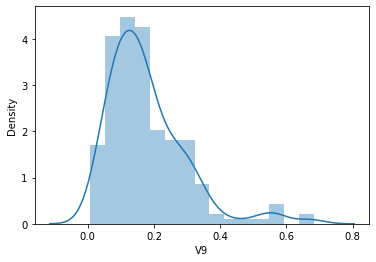

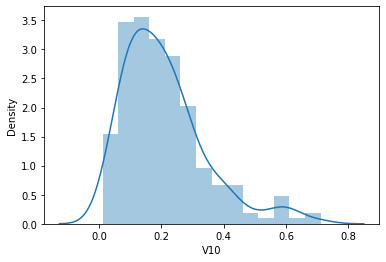

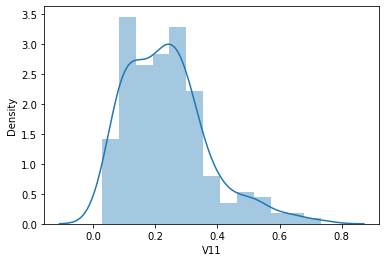

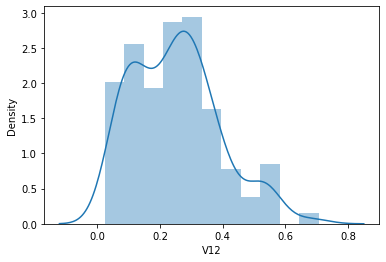

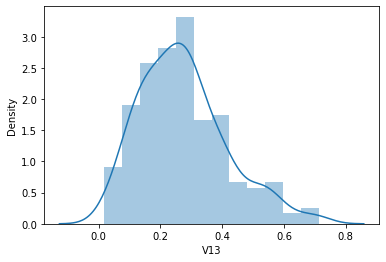

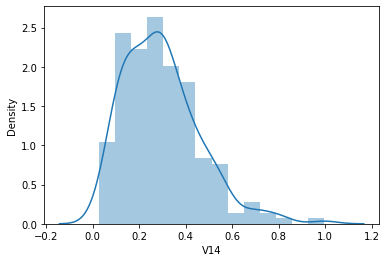

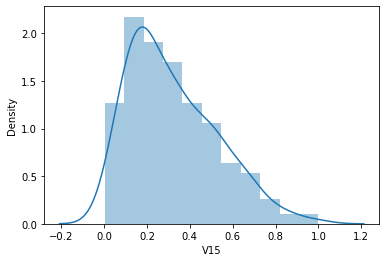

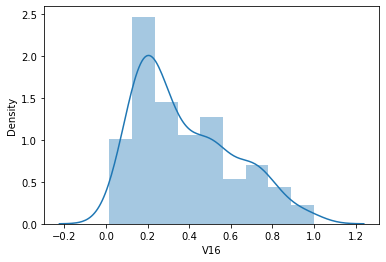

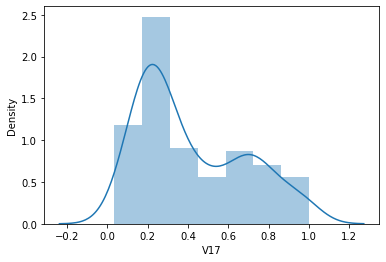

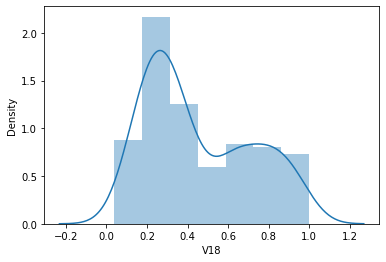

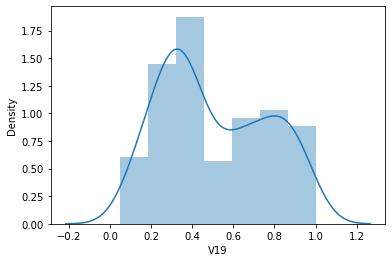

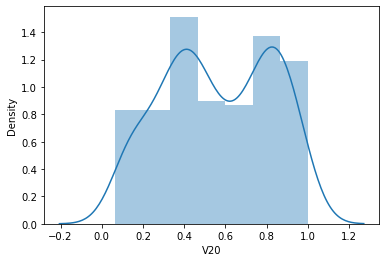

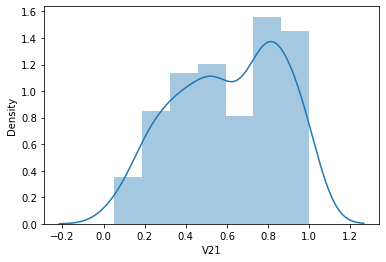

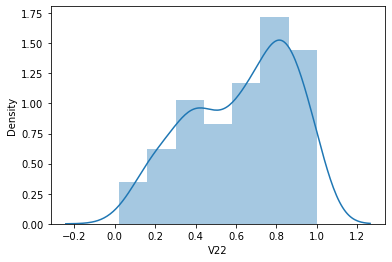

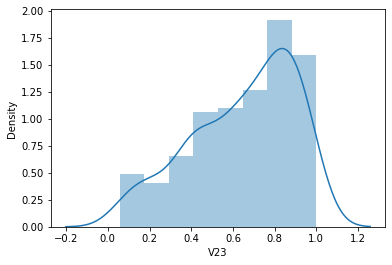

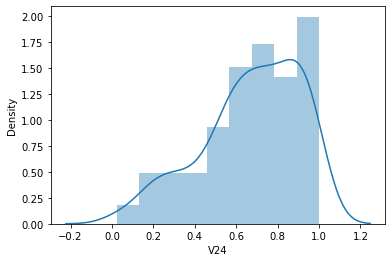

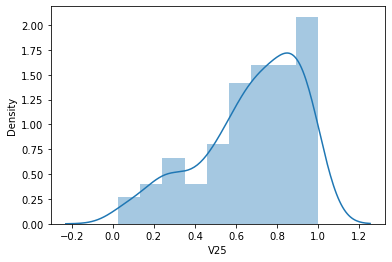

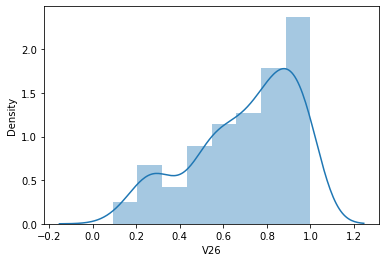

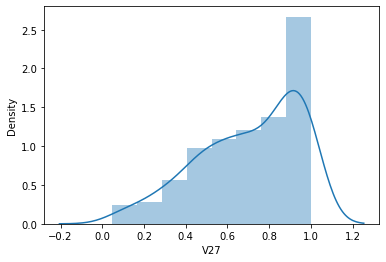

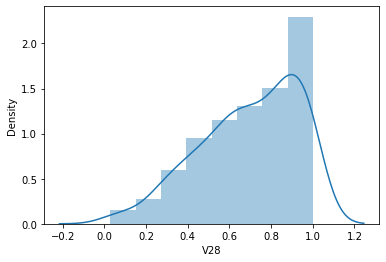

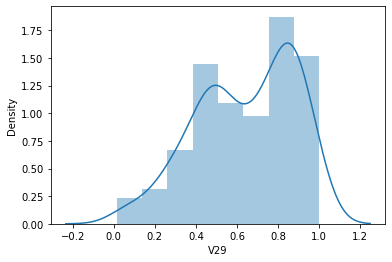

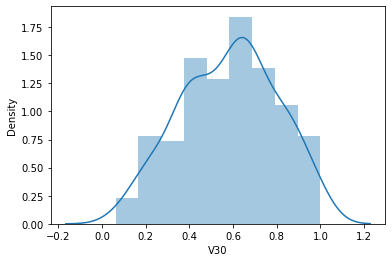

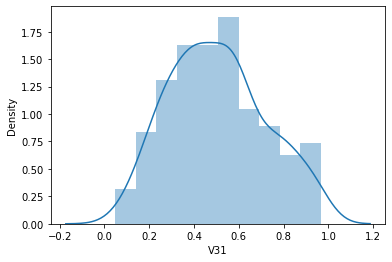

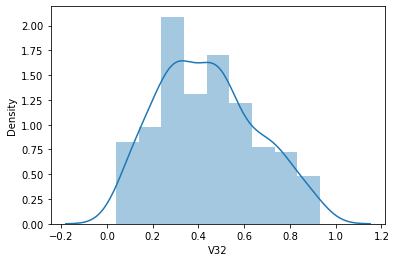

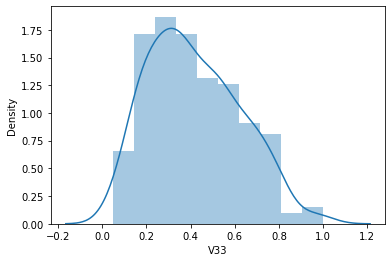

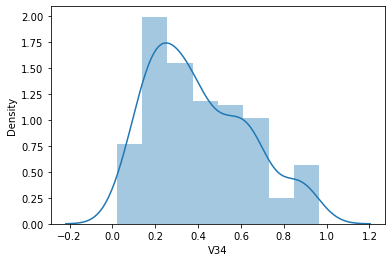

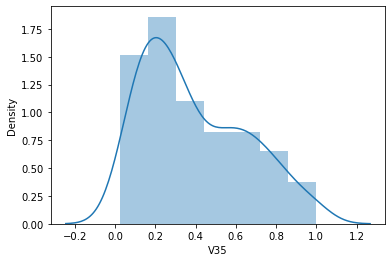

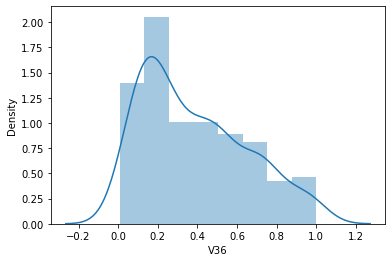

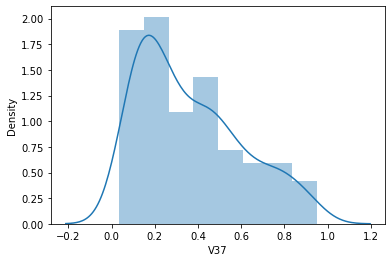

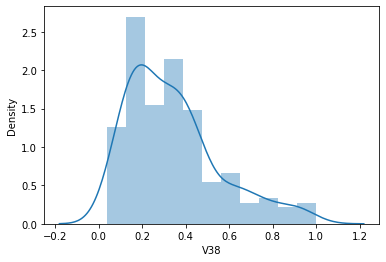

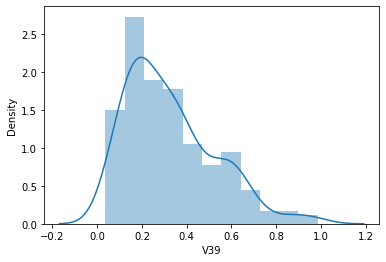

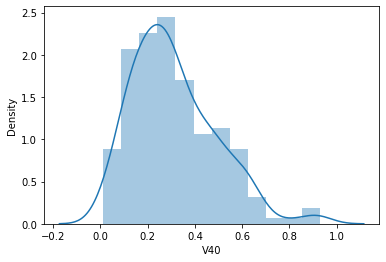

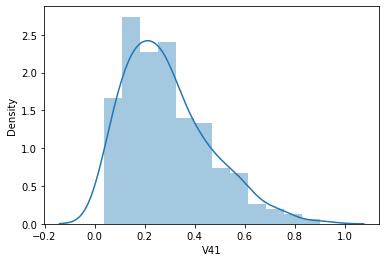

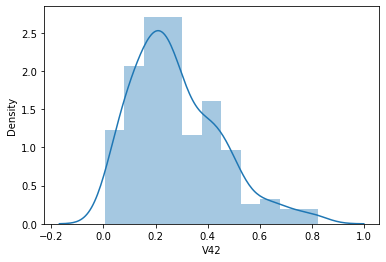

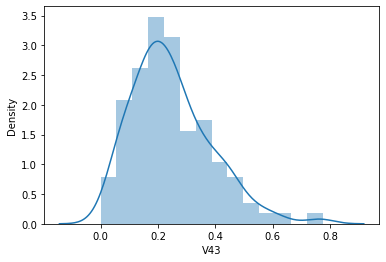

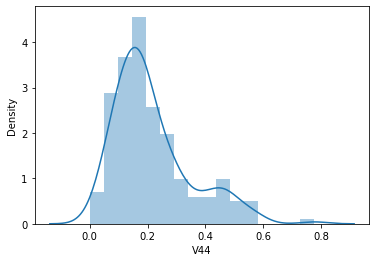

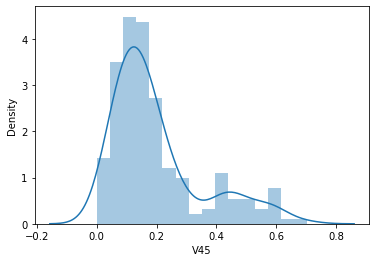

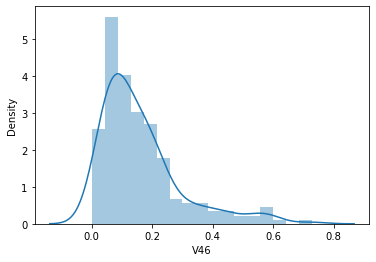

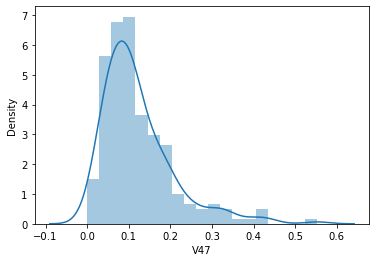

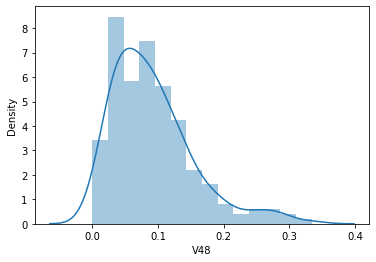

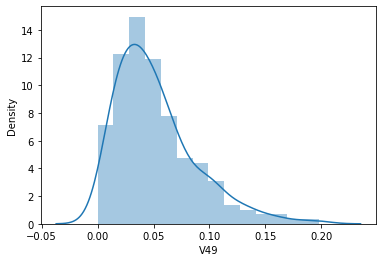

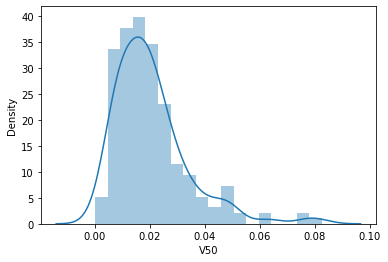

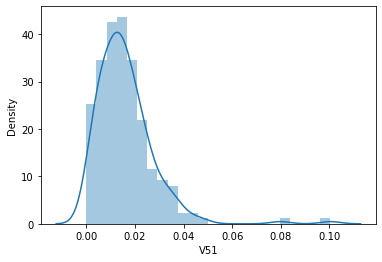

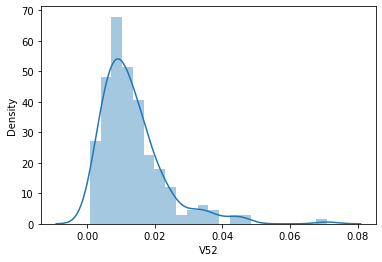

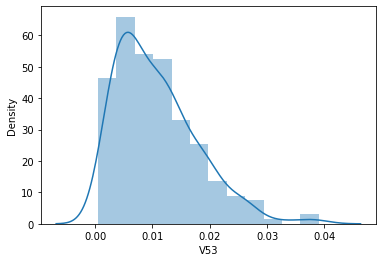

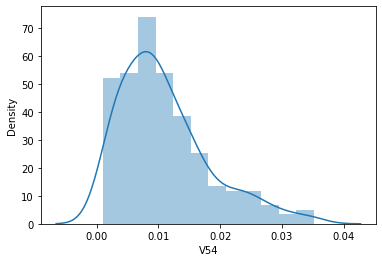

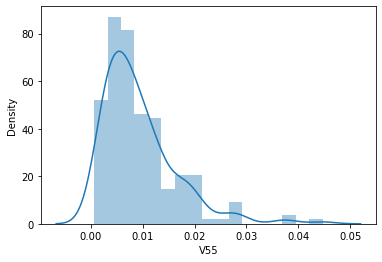

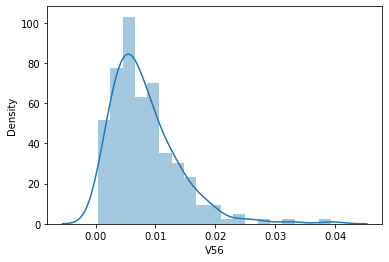

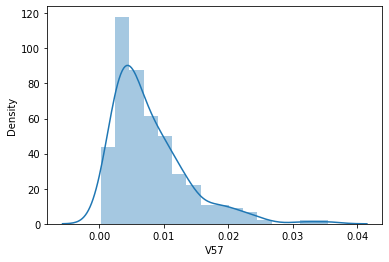

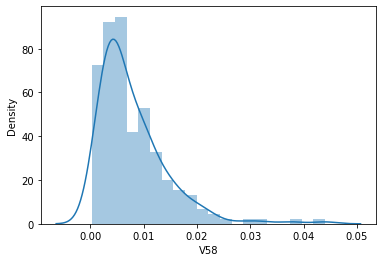

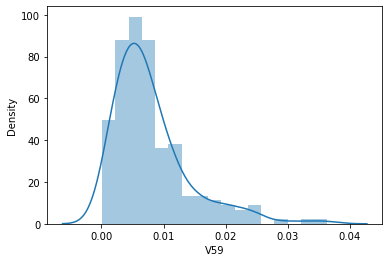

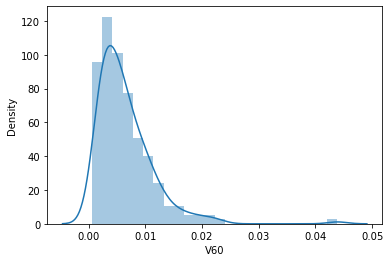

In [21]:
for col in dataset.select_dtypes('float'):
    plt.figure()
    sns.distplot(dataset[col])

Les variables n'ont pas l'air d'avoir été normalisé d'après les graphiques

## Relation Target / Variables

In [22]:
rocher_df = dataset[dataset['Class'] == 0]
mine_df = dataset[dataset['Class'] == 1]

In [23]:
continue_variable_columns = dataset.drop('Class', axis=1).columns

/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

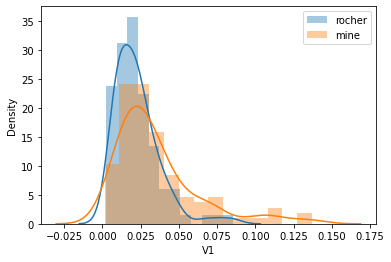

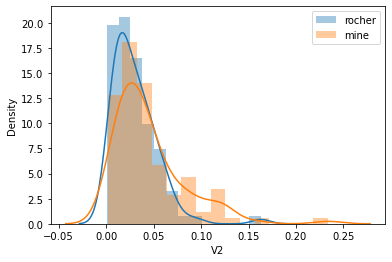

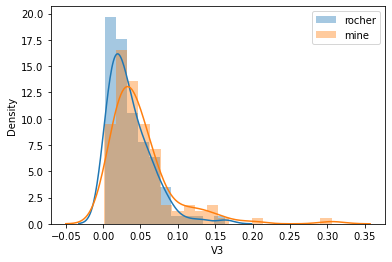

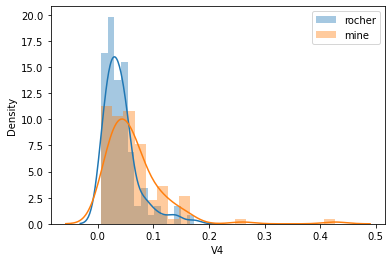

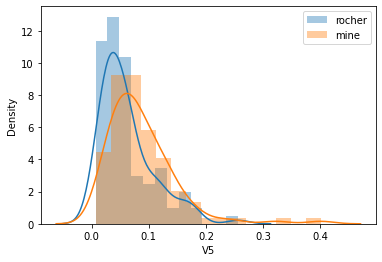

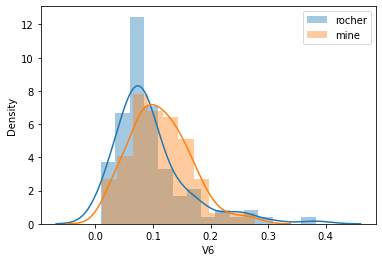

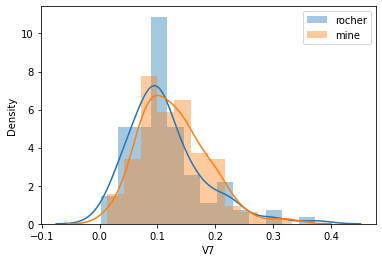

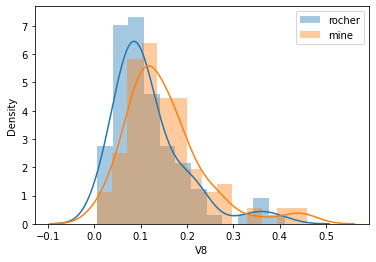

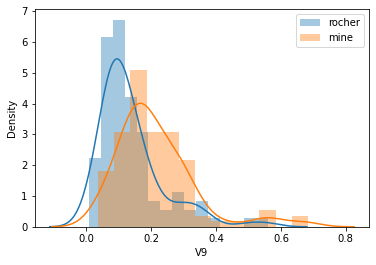

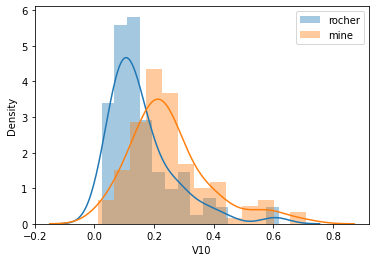

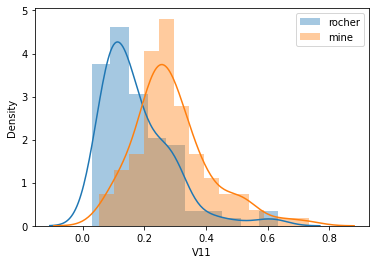

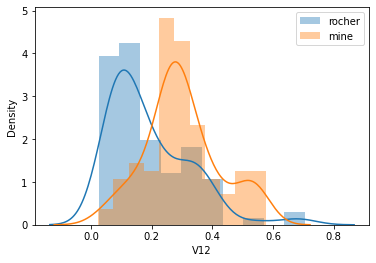

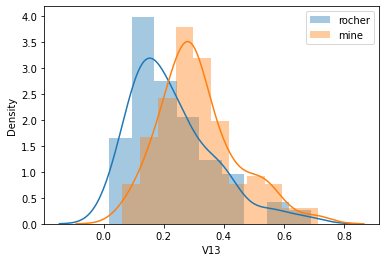

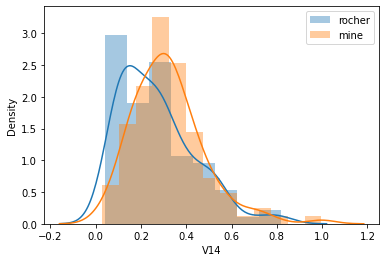

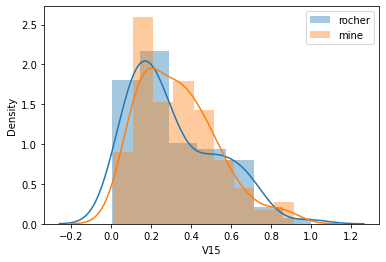

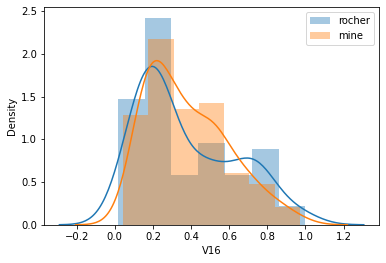

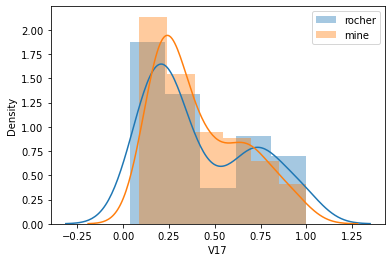

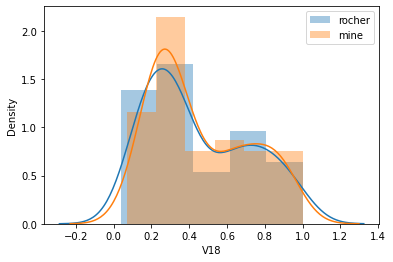

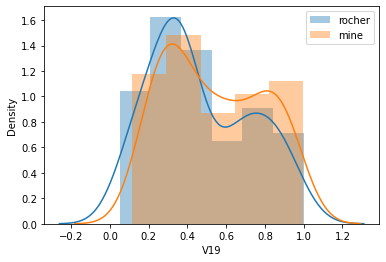

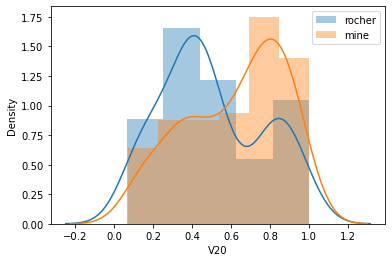

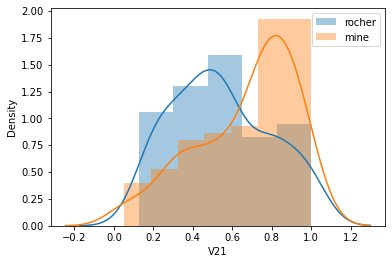

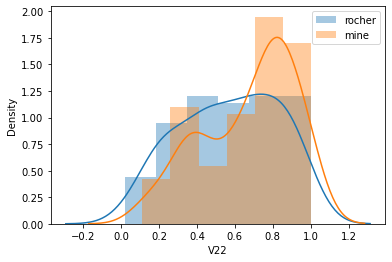

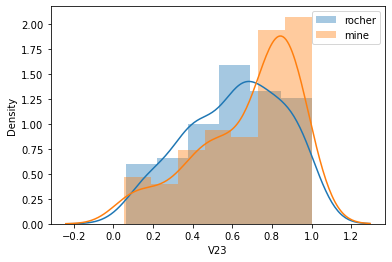

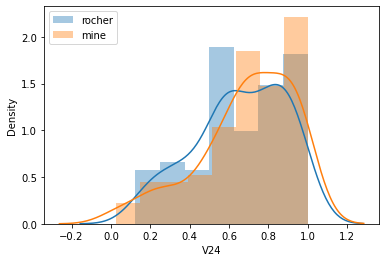

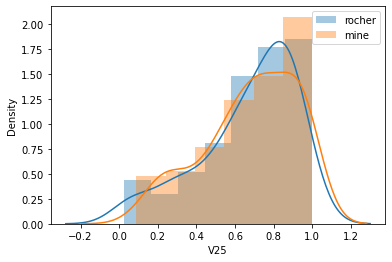

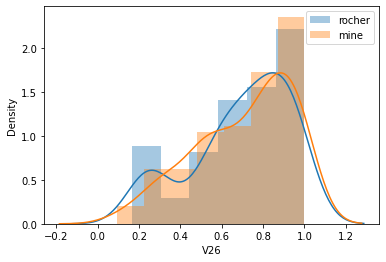

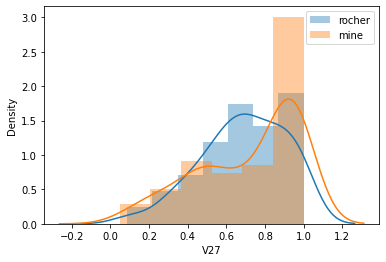

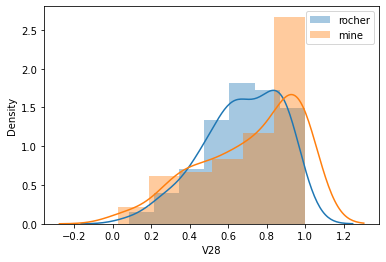

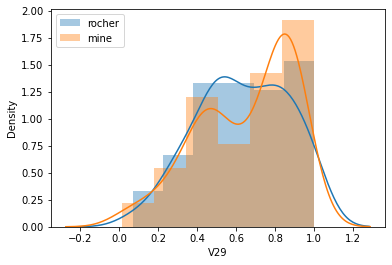

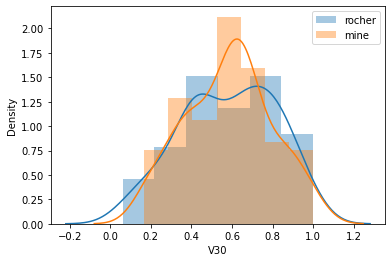

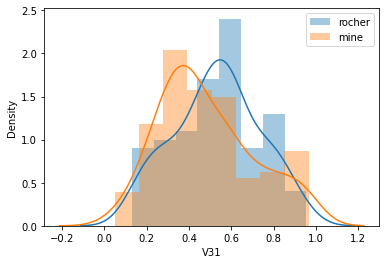

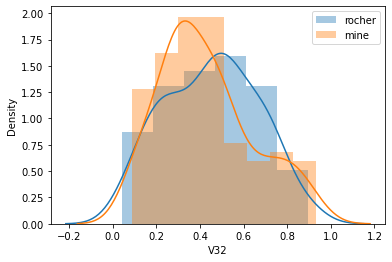

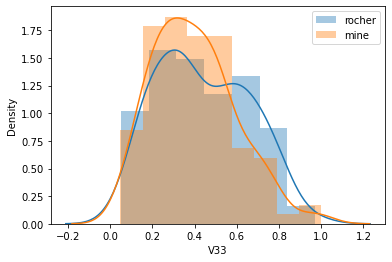

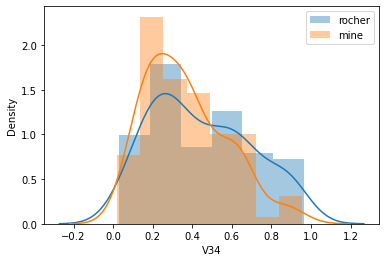

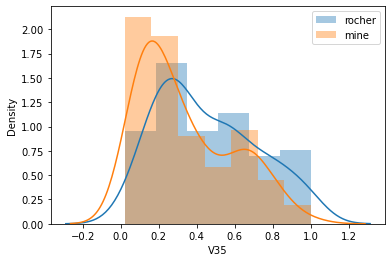

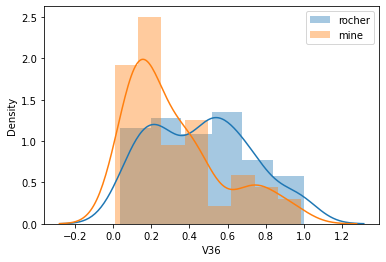

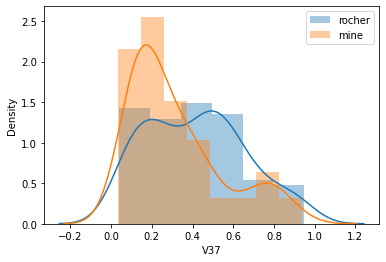

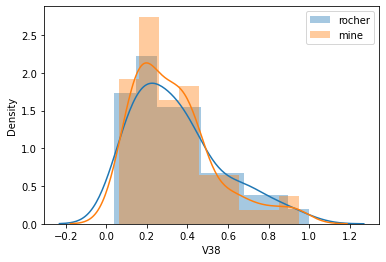

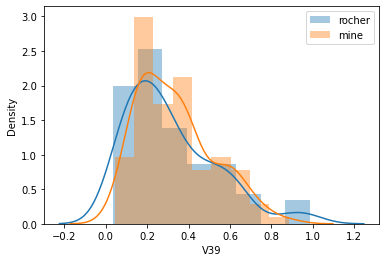

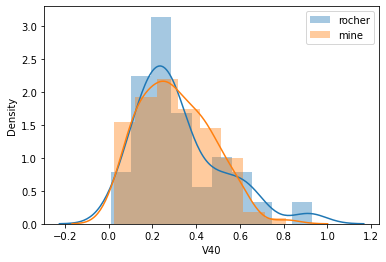

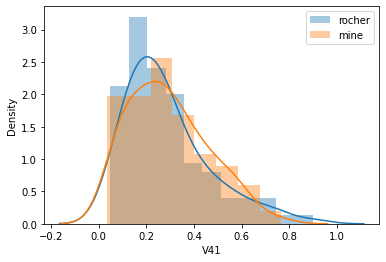

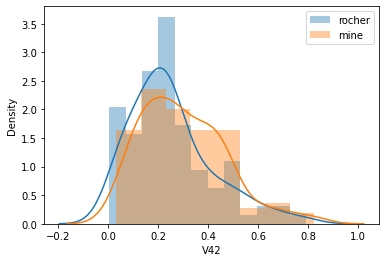

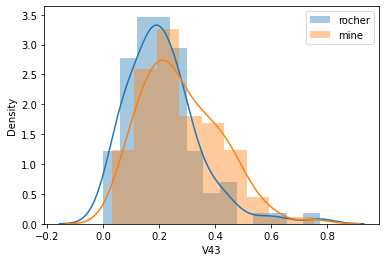

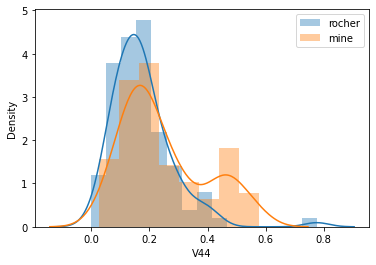

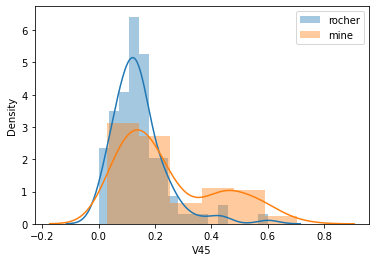

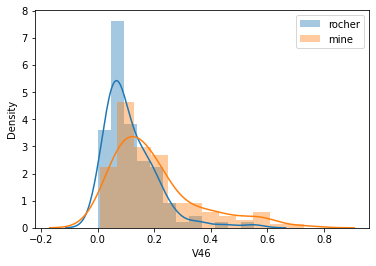

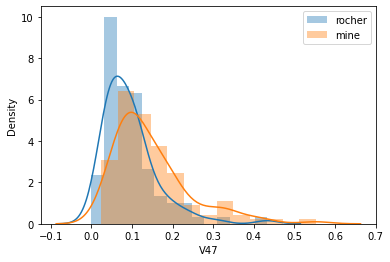

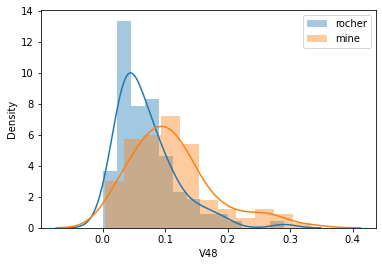

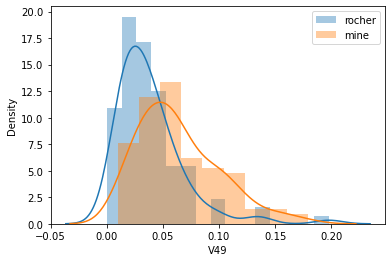

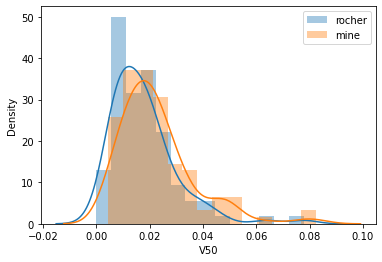

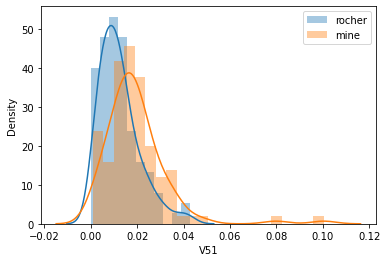

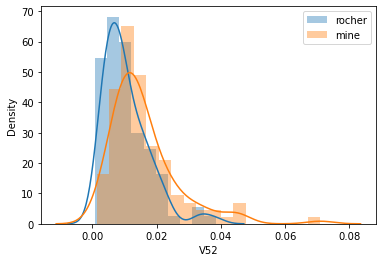

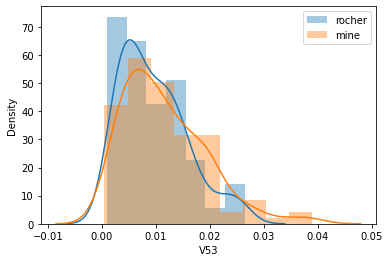

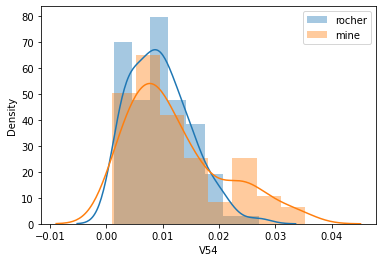

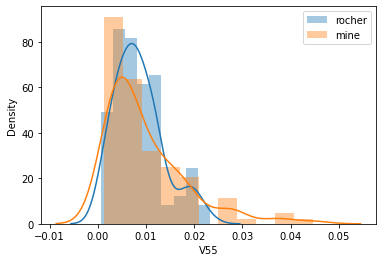

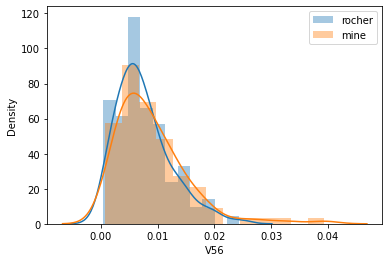

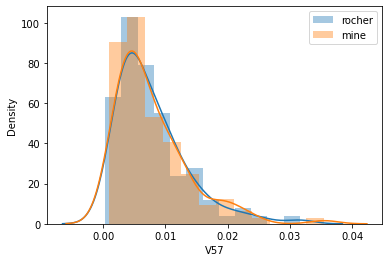

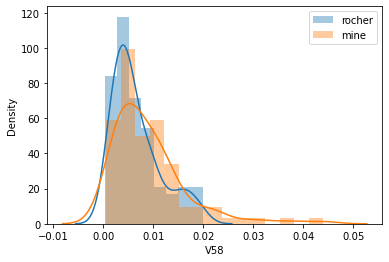

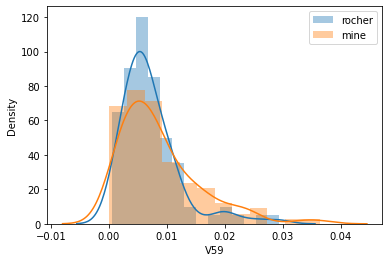

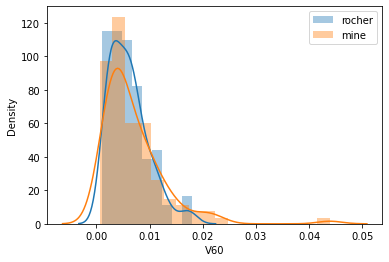

In [24]:
for col in continue_variable_columns :
    plt.figure()
    sns.distplot(rocher_df[col], label ='rocher')
    sns.distplot(mine_df[col], label ='mine')
    plt.legend()
    

Hypothèses : 
V1, V2, V3, V4, V5, V9, V10, V11, V12, V13, V20, V21, V22, V36, V37

V44, V45, V46, V49 
semblent lié au type d'objets


## Relation Variable / Variable 

### Relation variables continues

<AxesSubplot:>

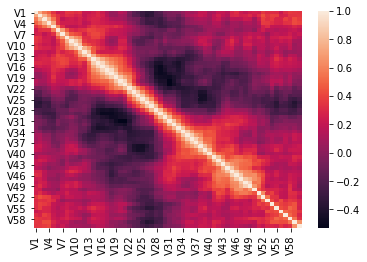

In [25]:
sns.heatmap(dataset[continue_variable_columns].corr())

certaines variables sont très corréler (à surveiller)

# Separating dataset in Trainset and Testset

In [77]:
df = dataset[['V1','V11','V13','V15','V17','V27','V28','V31','V38','V44','V47','V52','V57','V59','V60']]
df1 = dataset[['V9','V10','V11','V12','V36','V52','V49','V58','V43','V51']]
y = dataset['Class']
X = dataset.drop('Class', axis=1)
#X = df1

In [78]:
#transformer = make_column_transformer((StandardScaler(),X.columns))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Nous allons mettre de cotés le testset car ca sera notre dataset ou l'on pourra tester nos modèle sans être biaisé

# Modelisation

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [80]:
# ---- tests ----
model_1 = DecisionTreeClassifier(random_state=0)
model_2 = RandomForestClassifier(random_state=0)
model_3 = make_pipeline(SelectKBest(chi2, k=10),
                      RandomForestClassifier(random_state=0))
model_4 = make_pipeline(PCA(n_components=2),
                      RandomForestClassifier(random_state=0))
    
model_5 = make_pipeline(PolynomialFeatures(2), SelectKBest(chi2, k=10),
                       RandomForestClassifier(random_state=0))
# ----------------
                      
# on va effectuer un test de anova

# Procedure d'évaluation

Nous allon ici utiliser la metric f1 car c'est une très bonne metric pour avoir un bon aperçu entre le rapport de la précision et de la sensibilité (recall). 
La précision et le recall sont des metriques qui permettent de mesurer les proportions d'erreur de type 1 (faux positifs) et 2 (faux négatifs) dans notre dataset

In [46]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve



classification_report : c'est un outil qui va nous faire un bilan du recall, precision, score f1 et même de l'exactitude (accuracy).

learning_curve : cela va nous permettre de comprendre si norte model est en overfitting ou en underfitting. A partir de la on va pouvoir prendre des decisions (selection de variables / creer des polynomes ... )

In [81]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                              train_sizes=np.linspace(0.1,1,10))
    # learning_curve utilise la validation croisé pour entrainer et évaluer notre modèle sur plusieur split de notre dataset
    # Notre modèle doit être entrainer sur le X_train et le y_train avec une cross validation = 4 en découpant le train_size de 0,1 à 1 en prenant 10 découpe
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[14  7]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.73      0.90      0.81        21

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.80      0.79      0.78        42



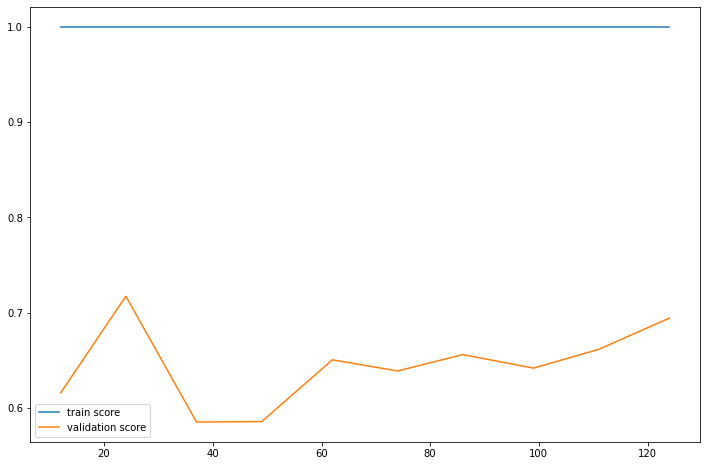

In [112]:
evaluation(model_1)

model_1 : 
f1_score : 
0->0,76 
1->0,81 
Accuracy : 0,79
avg: 0,78

model_2 : 
f1_score : 
0->0,87 
1->0,89
Accuracy : 0,88
avg: 0,88

model_3 : 
f1_score : 
0->0,79 
1->0,83 
Accuracy : 0,88
avg: 0,88
--> chi2 k=10

model_4 : 
f1_score : 
0->0,60 
1->0,59 
Accuracy : 0,60
avg: 0,60

model_5 : 
f1_score : 
0->0,44
1->0,58 
Accuracy : 0,52
avg: 0,51


model_2 retenu 
-> feature selection 
-> moins bon resultat
model_2 : 
f1_score : 
0->0,72
1->0,79
Accuracy : 0,76
avg: 0,76

A première vue cette première évaluation avec le decisionTree parrait assez bonne puisque nous l'avons effectuée sans avoir aucun preprocessing. Nous avons uun f1_score égal à 0,81 pour la classe 1. 

On obtient également les courbes d'apprentissages pour notre modèle en cours et la on peut commencer à faire le diagnostique de notre modèle.

On voit que notre modèle "est en over-fiting" car notre modèle a un score de 100 % sur les données du trainset, mais il a légerement du mal à généraliser sur de nouveaux cas. Nous voyons une performence qui est tout de même assez élevée (f1 score). 
On dirait que l'on est en train de s'ameliorer progressivement. 
On remarque que plus on a de données et plus notre score sur le validation augmente

Plus de données aurait pu augmenter les performences. 
La selection de variables peut également ameliorer les performences !

<AxesSubplot:>

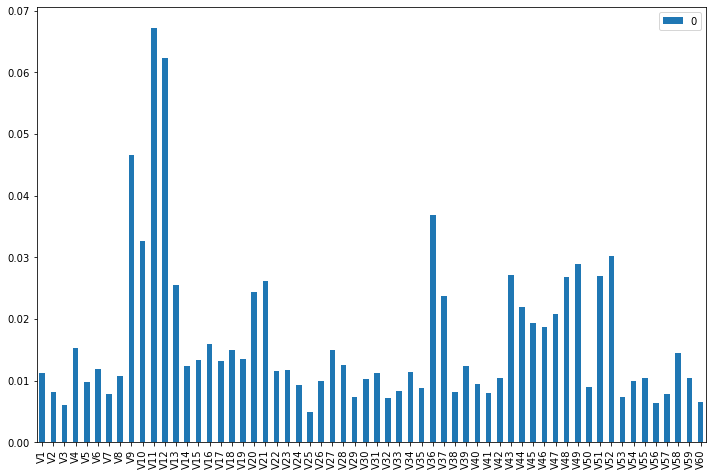

In [49]:
pd.DataFrame(model_2.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

Nous remarquons qu'il y a beaucoup de variables qui n'ont aucune importances. 

On peut donc essayre de les supprimer. 
on obtient des resultats legerement meilleurs mais on peut faire mieux ...

On va essayer le RandomForestClassifier -> mieux f1score 0,88

On peut aussi essayer le select_k_best_ que l'on va mettre dans une pipelinec -> résultats moyen, on regresse a 0,80.

(pour l'instant nous n'avons pas besoin de faire de normalisation car nous travaillons avec des arbres et ces modèles de nécessitent pas de normalisation).

On peut essayer une autre technique : une expansion polynomiale suivie d'un PCA ou d'un selectKBest. On peut essayer tenter de faire un polynomialFeatures avec un degres = 2 ce qui va avoir comme effet d'élever chaque variable au carré et de multiplier chaque variable avec ses voisines. 
-> pire ! f1_score de 0,50

## Modelisation

Nous allons dans cette étape developer un modele de machine learning en essayant de l'optimiser pour avoir les meilleur performance possible. 

Nous allons prcéder de la manière suivante : 

Nous allons entrainer plusieur modèle différents puis nous retiendrons celui qui aura la meilleur performance. 

Nous allons ensuite tenter d'ameliorer la performence de ce modèle en optimisant ses hyper-paramètres grâce à une série de plusieurs algorithmes gread_search_cv.

Enfin nous utiliserons les courbes de précision et de recall afin de trouver le meilleur threadshold pour notre modele de ML.

### Etape précedente 

nous avions déjà entrainé un modele de ML dans le but de faire du pre processing. 
C'etait donc un model de base qui nous avait permit de faire de la selection de variable ds le but d'ameliorer au maximum les performences de ce modele de base.

Nous allons donc essayer d'ameliorer la perf du model en lui-meme sur la base de ce que nous avions fait juste avant.

In [50]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(chi2, k=5))

In [82]:
#RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
RandomForest = RandomForestClassifier(random_state=0)
#AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0)
AdaBoost = AdaBoostClassifier(random_state=0)
# il est imperatif de normaliser le jeu de donnée pour SVM.
#SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
SVM = make_pipeline(StandardScaler(), SVC(random_state=0))
#KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [83]:
dic_of_models = {'RadomForest': RandomForest,
                  'AdaBoost': AdaBoost, 
                  'SVM': SVM, 
                  'KNN': KNN
                 }

RadomForest
[[17  4]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.83      0.95      0.89        21

    accuracy                           0.88        42
   macro avg       0.89      0.88      0.88        42
weighted avg       0.89      0.88      0.88        42

AdaBoost
[[18  3]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.86      0.90      0.88        21

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

SVM
[[16  5]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.80      0.95      0.87        21

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86   

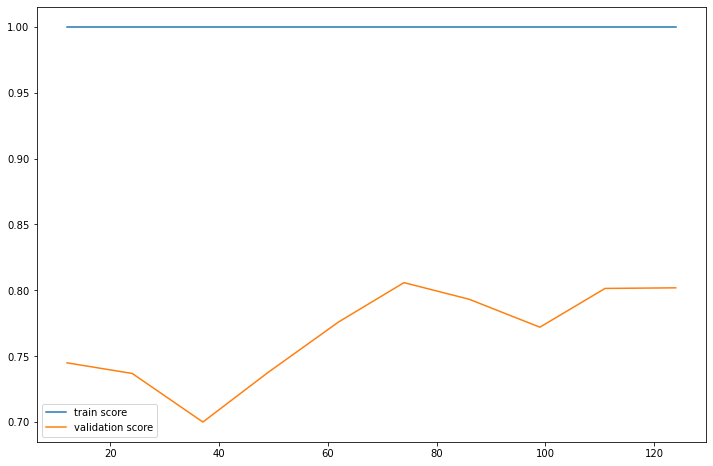

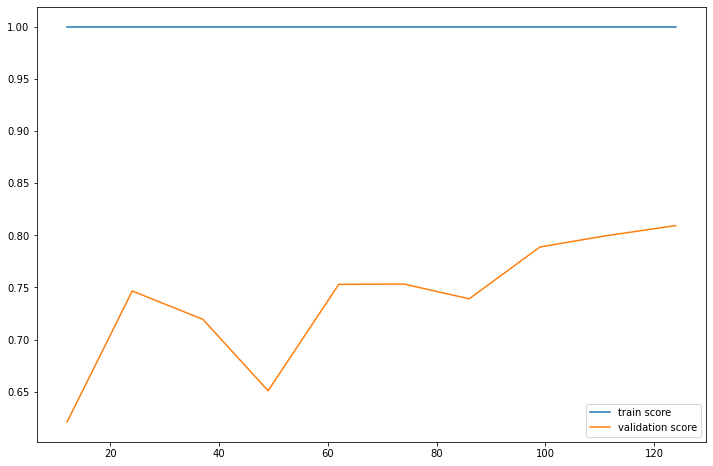

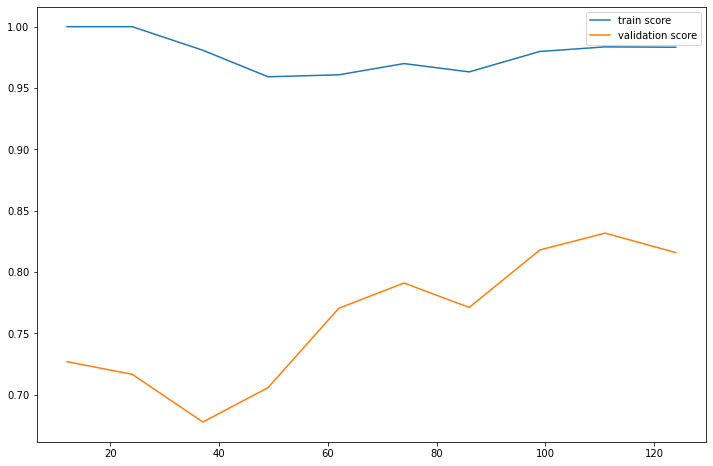

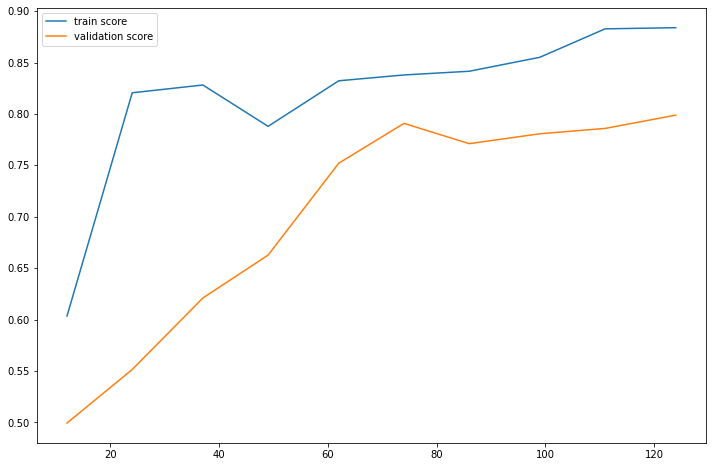

In [84]:
for name, model in dic_of_models.items() :
    print(name)
    evaluation(model)


En se basant sur le f1_score concernant la target 1 (les mines) : les meilleurs models sont donc RadomForest(f1:0,89), AdaBoost(f1:0,88). 

Adaboost à l'air de bien généraliser d'après la courbe d'apprentissage.

Les autres modèles sont aussi bon mais ils ont légerement plus de mal au niveau de la precision de la prediction des 1 (SVM: precision: 0,80 -- KNN:0,74)

Il est interressant de voir aussi que les modèles SVM et KNN ont l'air de mieux arriver à généraliser leurs resultats comme nous le montre les courbe d'apprentissage (surtout KNN). L'ecart entre le train score et la validation score est moins important pour ces modèles la.

## Optimisation de AdaBoost

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# ce que va faire RandomizedSearchCV c'est de chercher de facon aleatoire dif combinaisons ds tout le domaine des hyperparametre

parametre du modele AdaBoost : 
    
base_estimator: This parameter is used to signify the type of base learners we can implement or the type of weak learner we want to use. 
It can Decision tree, Logistic Regressor, SVC anything. It cannot be Knn as the weight cannot be assigned in this model. 
By default, the base estimator is DecisionTreeClassifier(max_depth=1).

n_estimators: The number of base estimators or weak learners we want to use in our dataset. By default, the n_estimator is 50.

learning_rate: This parameter is provided to shrink the contribution of each classifier. By default, it is provided a value of 1.

algorithm: It can be either SAMME or SAMME.R. The performance of the SAMME and SAMME.R algorithms are compared. SAMME.R uses the 
probability estimates to update the additive model, while SAMME uses the classifications only. As the example illustrates, the SAMME.R algorithm 
typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. As we have seen, SAMME.R breaks after the error goes above 1/2. 
However this is not the case for SAMME although error can be bigger than 1/2 (or equal to 1/2), the weight of the estimator is still positive; hence, the misclassified 
training samples get more weights, and the test error keeps decreasing even after 600 iterations.


parametre sur lesquels on va essayer de jouer : n_estimators, base_estimator

[0.8202840434419383, 0.7549196255078608, 0.8265637065637066, 0.8275303643724696, 0.8093567251461987, 0.7404892914103439, 0.7221049920270588, 0.7089889127040829, 0.7270069307221009]


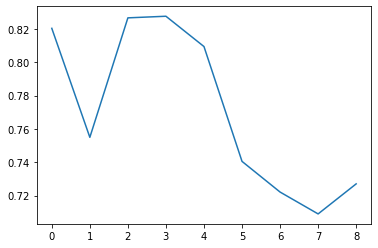

In [85]:
val_score = []
for k in range(1,10):
    
    # on définit un modele de base
    base = DecisionTreeClassifier(max_depth=k)
    
    model = AdaBoostClassifier(base_estimator=base,random_state=0)
    
    score = cross_val_score(model, X_train, y_train, cv = 5, scoring='f1').mean()
    val_score.append(score)
    

print(val_score)
plt.plot(val_score)


On voit que notre meilleure score est pour une profondeur de 3 avec un score f1 de 0,828

Maximum value: 0.8461836266714314 At index:  24


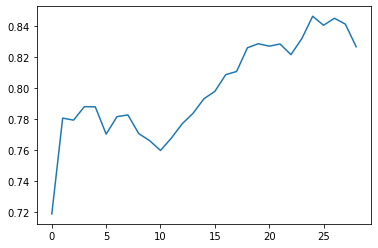

In [86]:
val_score = []
for k in range(1,30):
    
    # on définit un modele de base
    base = DecisionTreeClassifier(max_depth=k)
    
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=k,random_state=0)
    
    score = cross_val_score(model, X_train, y_train, cv = 5, scoring='f1').mean()
    val_score.append(score)
    

plt.plot(val_score)

max_value = None
max_idx = None
for idx, num in enumerate(val_score):
    if (max_value is None or num > max_value):
        max_value = num
        max_idx = idx

print('Maximum value:', max_value, "At index: ", max_idx)

In [87]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": range(20,30)
             }

In [90]:
DTC = DecisionTreeClassifier(random_state = 0,max_depth = 3)

ABC = AdaBoostClassifier(base_estimator = DTC,random_state=0)

grid = GridSearchCV(ABC, param_grid, scoring='f1', cv=5)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 25}
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.88      1.00      0.93        21

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42



## Precision Recall Curve

In [91]:
from sklearn.metrics import precision_recall_curve

In [92]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

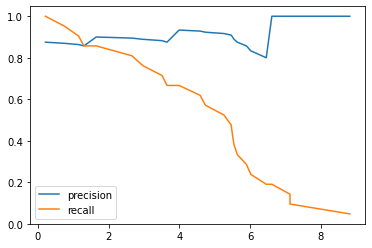

In [93]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')

plt.legend()

En général le score f1 se situe au croisement des deux courbes

In [94]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [95]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=0)

In [96]:
f1_score(y_test, y_pred)

0.9333333333333333

In [97]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [98]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

1.0
0.875


# Autres Modèles

## KNeighborsClassifier

In [99]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7857142857142857

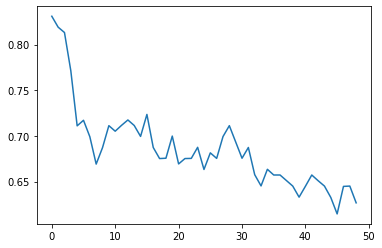

In [100]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)

/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


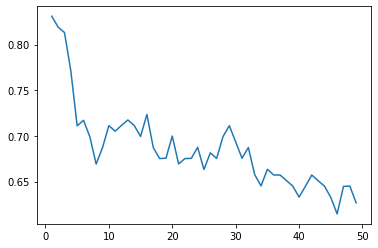

In [101]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1))


In [102]:
param_grid = {'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [103]:
grid.best_score_

0.8614973262032086

In [104]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [105]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.8095238095238095

In [106]:
confusion_matrix(y_test, model.predict(X_test))

array([[15,  6],
       [ 2, 19]])

In [107]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.76      0.90      0.83        21

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42



In [108]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10))

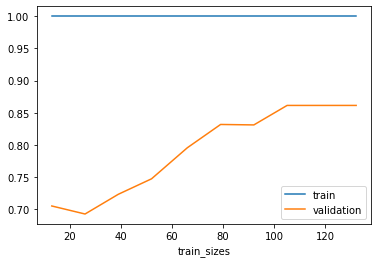

In [109]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## SVM

In [110]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000]
               }

grid = RandomizedSearchCV(SVM, hyper_params, scoring='f1', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

/Users/pierreperrin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 15 is smaller than n_iter=40. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'svc__gamma': 0.001, 'svc__C': 1000}
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.86      0.90      0.88        21

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



[[18  3]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.86      0.90      0.88        21

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



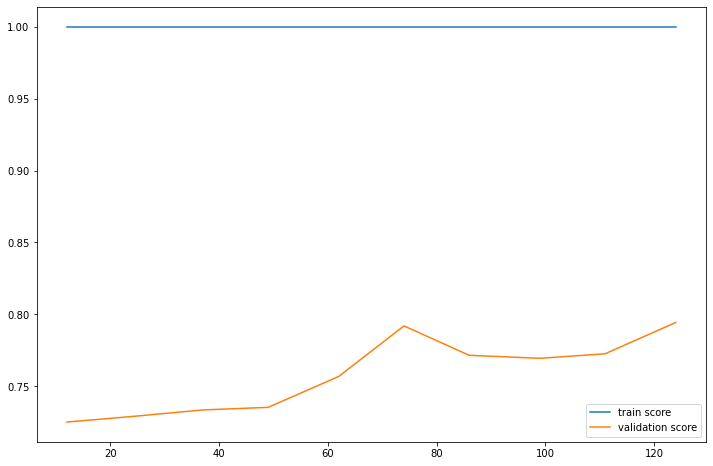

In [111]:
evaluation(grid.best_estimator_)